# Bivario with Matplotlib

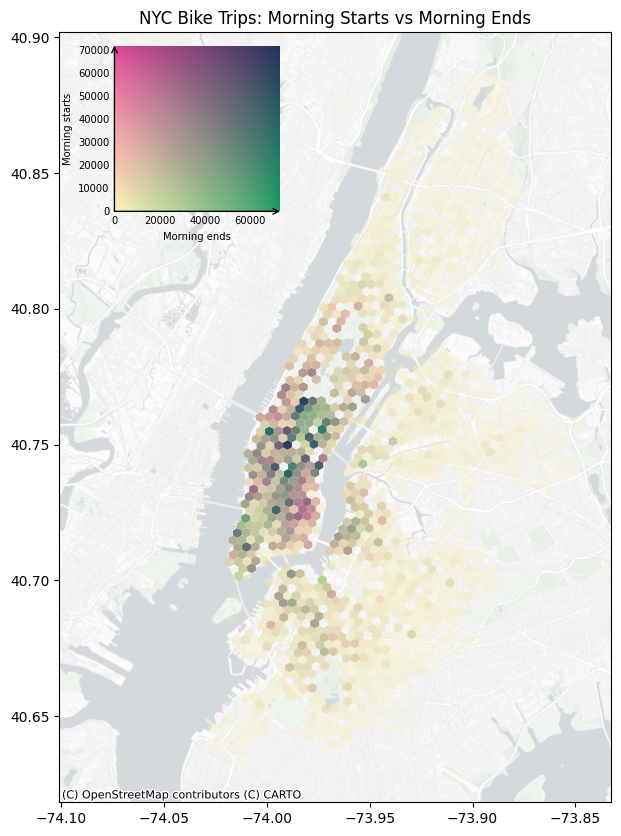

Below is an examples of how to plot the geo data with matptotlib using [`geopandas.GeoDataFrame.plot()`](https://geopandas.org/en/latest/docs/reference/api/geopandas.GeoDataFrame.plot.html) function.

In [ ]:
import contextily as cx
import matplotlib.pyplot as plt

from bivario import get_bivariate_cmap
from bivario._alpha import prepare_alpha_values
from bivario._scheme import apply_mapclassify
from bivario.example_data import nyc_bike_trips
from bivario.legend import plot_bivariate_legend

## Load the data

We will use example data from the library representing NYC Bike trips aggregated per H3 cells.

In [ ]:
gdf = nyc_bike_trips()
gdf

## Load and apply bivariate colourmap

We will calculate RGB values for each row and use it in the `.plot()` function.

In [ ]:
cmap = get_bivariate_cmap()
colours = cmap(gdf["morning_starts"], gdf["morning_ends"])
colours

## Basic plot with inset legend

We will plot values in raw numerical mode and plot a legend in a designated separate inset axis.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15), dpi=200)

gdf.plot(
    color=colours,
    ax=ax,
)

gdf.boundary.plot(ax=ax, color="black", linewidth=0.5, alpha=0.1)

# Plot legend as inset axis
inset_width = 0.3
inset_height = 0.25
x0 = 0.1
y0 = 1 - inset_height
inset_pos = [x0, y0, inset_width, inset_height]

inset_coords = ax.transAxes.transform(inset_pos[:2])
inset_size = ax.transAxes.transform([inset_width, inset_height]) - ax.transAxes.transform([0, 0])
inset_fig_coords = fig.transFigure.inverted().transform(inset_coords)
inset_fig_size = fig.transFigure.inverted().transform(inset_size + inset_coords) - inset_fig_coords

legend_ax = fig.add_axes((*inset_fig_coords, *inset_fig_size))
plot_bivariate_legend(
    gdf["morning_starts"],
    gdf["morning_ends"],
    ax=legend_ax,
    cmap=cmap,
    label_a="Morning starts",
    label_b="Morning ends",
    tick_fontsize_px=24,
)

ax.set_title("NYC Bike Trips: Morning Starts vs Morning Ends")

cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.CartoDB.PositronNoLabels, zoom=13)

plt.show()

## Calculate alpha values

To improve readability, we can calculate alpha values to make regions with small values in both columns be less visible.

In [ ]:
alpha_values = prepare_alpha_values(gdf["morning_starts"], gdf["morning_ends"])
alpha_values

## Apply `mapclassify` scheme

To make the colours more readable for the user, we can apply `mapclassify` to bin values together.

By default, the values are grouped into 5 bins with `NaturalBreaks` algorithm.

In [ ]:
binning_result = apply_mapclassify(gdf["morning_starts"], gdf["morning_ends"])

## Recalculate the colours with new binning result

We will load another palette and set it to dark mode.

In [ ]:
cmap = get_bivariate_cmap("glacier_ember", dark_mode=True)
binned_colours = cmap(binning_result.values_a, binning_result.values_b)

## Plot grouped data in dark mode

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15), dpi=200)

gdf.plot(
    color=binned_colours,
    alpha=alpha_values,
    ax=ax,
)

gdf.boundary.plot(ax=ax, color="white", linewidth=0.5, alpha=0.1 * alpha_values)

# Plot legend as inset axis
inset_width = 0.3
inset_height = 0.25
x0 = 0.1
y0 = 1 - inset_height
inset_pos = [x0, y0, inset_width, inset_height]

inset_coords = ax.transAxes.transform(inset_pos[:2])
inset_size = ax.transAxes.transform([inset_width, inset_height]) - ax.transAxes.transform([0, 0])
inset_fig_coords = fig.transFigure.inverted().transform(inset_coords)
inset_fig_size = fig.transFigure.inverted().transform(inset_size + inset_coords) - inset_fig_coords

legend_ax = fig.add_axes((*inset_fig_coords, *inset_fig_size))
# We will use binning result values to plot the legend
grid_size_x = binning_result.k_b  # note the switch here - second variable goes to X axis
grid_size_y = binning_result.k_a  # first variable goes to Y axis

plot_bivariate_legend(
    gdf["morning_starts"],
    gdf["morning_ends"],
    ax=legend_ax,
    cmap=cmap,
    label_a="Morning starts",
    label_b="Morning ends",
    tick_labels_a=binning_result.tick_labels_a,
    tick_labels_b=binning_result.tick_labels_b,
    grid_size=(grid_size_x, grid_size_y),
    tick_fontsize_px=24,
    dark_mode=True,
)

ax.set_title("NYC Bike Trips: Morning Starts vs Morning Ends")

cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.CartoDB.DarkMatterNoLabels, zoom=13)

plt.show()

## Plot legend next to map

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15), dpi=200, width_ratios=[2, 1])

gdf.plot(
    color=binned_colours,
    alpha=alpha_values,
    ax=ax1,
)

gdf.boundary.plot(ax=ax1, color="white", linewidth=0.5, alpha=0.1 * alpha_values)

# We will use binning result values to plot the legend
grid_size_x = binning_result.k_b  # note the switch here - second variable goes to X axis
grid_size_y = binning_result.k_a  # first variable goes to Y axis

plot_bivariate_legend(
    gdf["morning_starts"],
    gdf["morning_ends"],
    ax=ax2,
    cmap=cmap,
    label_a="Morning starts",
    label_b="Morning ends",
    tick_labels_a=binning_result.tick_labels_a,
    tick_labels_b=binning_result.tick_labels_b,
    grid_size=(grid_size_x, grid_size_y),
    tick_fontsize_px=24,
    dark_mode=True,
    # we set the font colour to black to contrast with the white boundary
    # dark_mode set to True makes the font white by default
    font_colour="black",
)

ax1.set_title("NYC Bike Trips: Morning Starts vs Morning Ends")

cx.add_basemap(ax1, crs=gdf.crs, source=cx.providers.CartoDB.DarkMatterNoLabels, zoom=13)

plt.show()